# **PHISHING EMAIL DETECTOR MODEL COMPARISON**
---



In this notebook we compare different supervized classification models (SVM, KNN, DT, RF, LR, XGB). We compare their training time and performance.

In [ ]:
import pandas as pd
df=pd.read_csv("/content/sample_data/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0.0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0.0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0.0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1.0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0.0


**Loading, data explorating and preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

**Cleaning Data**

In [ ]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
df['text'][0]



Before cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
print('After cleaning:')
clean_str(df['text'][0])

After cleaning:


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [ ]:
# Create a new column with the cleaned messages
df['text_clean'] = df['text'].apply(lambda string: clean_str(string))

# Display the result
df.head()

AttributeError: ignored

In [ ]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.label
print(df)

AttributeError: ignored

In [ ]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model comparison**

In [ ]:

models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "Gradient Boosting": {"model":GradientBoostingClassifier(), "perf":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration

In [ ]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

In [ ]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Logistic Regr.,0.973913,1.16
1,Random Forest,0.971981,7.92
2,XGBoost,0.967150,6.30
3,SVM (Linear),0.964251,0.21
4,Gradient Boosting,0.960386,19.54
5,SVM (RBF),0.957488,5.19
6,Decision Tree,0.953623,0.79
7,KNN,0.871498,0.01


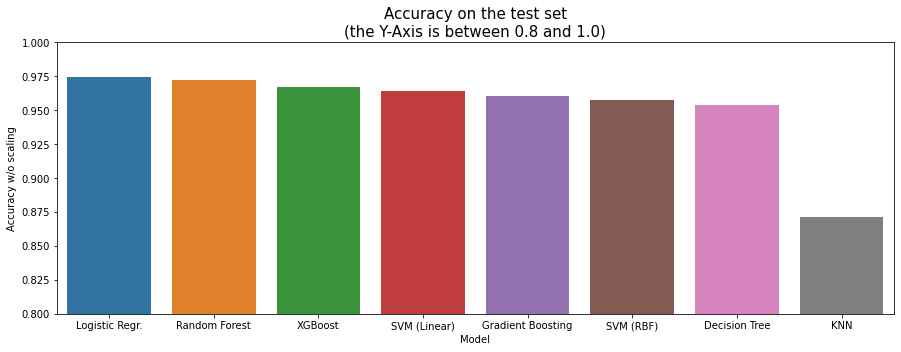

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

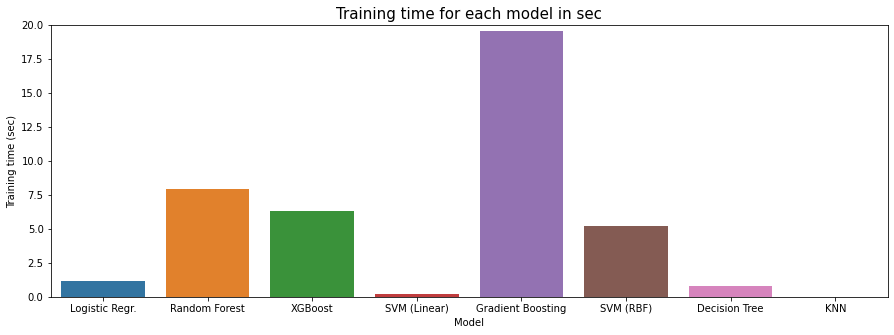

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,20)
plt.show()

***Linear Regressor gives the best accuracy among all the other models with 97.39% accuracy and training time 1.23 seconds. Compared to it, SVM(Linear) can be considered the second best model with 96.42% accuracy (slightly less than Linear Regr.) and training time much lesser than linear regr. that is 0.21 seconds.***

In [ ]:
import numpy as np
df=df.replace(np.nan,'hello how are you')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.toarray())

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X=X.toarray()
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size = 0.15, random_state = 0)

**Ensemble Algorithm**
*A single algorithm may not make the perfect prediction for a given dataset. Machine learning algorithms have their limitations and producing a model with high accuracy is challenging. If we build and combine multiple models, the overall accuracy could get boosted. The combination can be implemented by aggregating the output from each model with two objectives: reducing the model error and maintaining its generalization. The way to implement such aggregation is done below:*

In [ ]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [ ]:
#Defining 2 Decision Tree Classifiers
model1 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model2))

In [ ]:
#Defining 2 Random Forest Classifier
model3 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
estimators.append(('rf1', model3))
model4 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
estimators.append(('rf2', model4))


In [ ]:
#Defining 2 AdaBoost Classifier
model5 = clf = AdaBoostClassifier(n_estimators=100)
estimators.append(('adb1', model5))
model6 = clf = AdaBoostClassifier(n_estimators=100)
estimators.append(('adb2', model6))

In [ ]:
#Defining 2 Gradient Boosting Classifier
model7 = GradientBoostingClassifier(n_estimators=100)
estimators.append(('gb1', model7))
model8 = GradientBoostingClassifier(n_estimators=100)
estimators.append(('gb2', model8))

**Ensemble models** is a machine learning approach to combine multiple other models in the prediction process. Those models are referred to as base estimators.

In [ ]:
# Defining the ensemble model
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
print(cm_HybridEnsembler)

[[541   9]
 [ 24 202]]


In [ ]:
#Calculating Accuracy of the Hybrid Model
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred )

0.9574742268041238